In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Много пустых значений в столбцах с информацией о статусе апартаментов, а также близости парков и прудов. Что касается апартаментов, скорее всего люди, имеющие стандартное жилье, просто не заполняют это значение ввиду отсутствия высокой значимости параметра на продажу (с точки зрения продавца как физлица). Информация о близости парков и прудов заполнялась с помощью карт. Можно было бы внести больше данных. Непонятно, почему их так мало. От наполненности столбца "locality_name" это не зависит. При этом в столбцах с кол-вом парков и прудов в радиусе 3 км данных гораздо больше.

In [3]:
data.duplicated().sum()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Проверила кол-во дубликатов строк. Их не оказалось. Привела к нормальному типу столбец с датой. По-хорошему нужно было столбец "is_apartment" привести к типу bool, но тогда все пустые значения заполняются False, а это меняет % отношение True к False. Не знаю пока, на что это может повлиять, оставила как есть. Вообще скорее всего их можно заполнить все значением False, т.к., если бы квартира была апартаментами, продавец, знающий отличие от обычной жилой площади, указал бы это как важный пункт.

In [4]:
data_mean = data.mean().map(lambda n: '{:.2f}'.format(n)).astype(float)
for i in range(len(data.columns)):
    for j in range(len(data_mean.index)):
        if data.columns[i] == data_mean.index[j] and data.columns[i] != 'is_apartment':
            for row in data:
                it = data.columns[i]
                data[it] = data[it].fillna(value=data_mean[j])
data.head(15)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        23699 non-null float64
cityCenters_nearest     23699 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           23699 non-null float64
ponds_

In [30]:
data['floors_total'] = data['floors_total'].astype(int)
data['cost_meter'] = (data['last_price'] / data['total_area']).map(lambda n: '{:.2f}'.format(n)).astype(float)
data['area_living-total'] = (data['living_area'] / data['total_area']).map(lambda n: '{:.2%}'.format(n))
data['area_kitchen-total'] = (data['kitchen_area'] / data['total_area']).map(lambda n: '{:.2%}'.format(n))
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).day_name()

def floor_f_l(fl):
    if fl['floor'] == 1:
        return 'первый'
    elif fl['floor'] == fl['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_f'] = data.apply(floor_f_l, axis=1)

Задание 2.

1. Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?

Наиболее важными параметрами при продаже будут являться цена, жилая площадь помещения, кол-во комнат, этаж, близость к центру. Построив графики, отображающие зависимость цены от этих параметров, можно увидеть, что:
* По графику кажется, что размер жилой площади не сильно влияет на цену. Значения размываются большим количеством высоких значений. Но основная часть выборки уже видна: размер до 200 м2 будет продается в пределах 100 млн.
* По количеству комнат цена достигает максимума при 3-6 комнатах. Скорее всего дальше цена идет на убыль из-за того, что большее количество комнат может быть в загородных домах, а там цена падает из-за удаленности от города.
* Интересно раскинулись цены квартир в зависимости от этажности. Получается, что до 7 этажа цена приобретает максимальные значения, а после уже начинает падать
* И безусловно близость центра только поднимает цену квартиры. Хотя есть некие популярные районы на расстоянии 30, 40, 50 км.

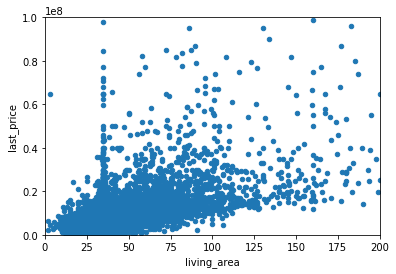

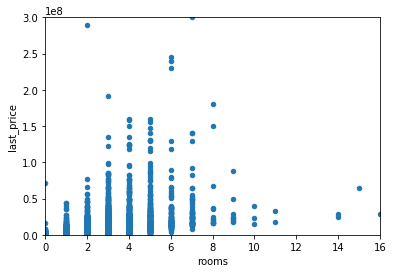

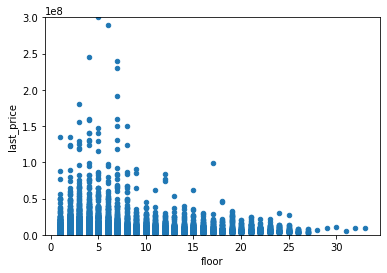

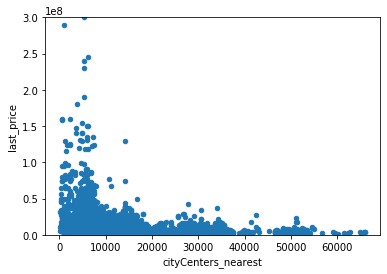

In [29]:
data.plot(kind='scatter', y='last_price', x='living_area', xlim=(0,200), ylim=(0,100000000))
data.plot(kind='scatter', y='last_price', x='rooms', xlim=(0,16), ylim=(0,300000000))
data.plot(kind='scatter', y='last_price', x='floor', ylim=(0,300000000))
data.plot(kind='scatter', y='last_price', x='cityCenters_nearest', ylim=(0,300000000))

Интересный график получается при построении зависимости первого дня размещения и общего кол-ва дней размещения объявления. Прослеживается спад некоего кризиса в сфере недвижимости, когда в 2015 году для продажи квартиры необходимо было потратить чуть ли не 2 года, а уже в середине 2016 года можно было продать квартиру за пару дней. Что-то также происходило с 07.2016 по 01.2017. Скачек активности. Нужно смотреть ситуацию локально. Прямая линия в значении 180 - это среднее значение, которым я заполнила пропуски Nan.
На графике зависимости количества дней размещения объявления от цены видно, что цена не сильно влияет на скорость продажи. Большой разброс значений в категории до 20 миллионов объясняется скорее бОльшим предложением на рынке.
Квартиры в среднем продаются за 180 дней (полгода)

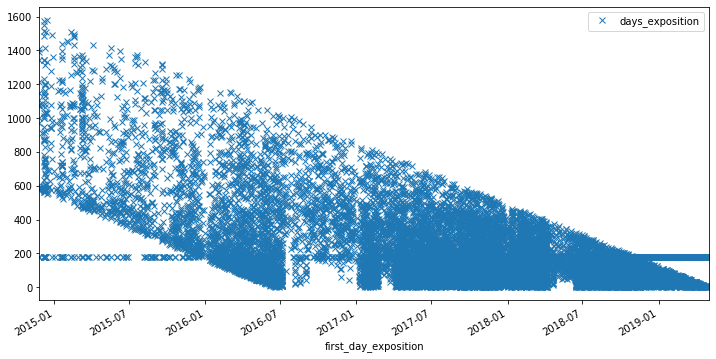

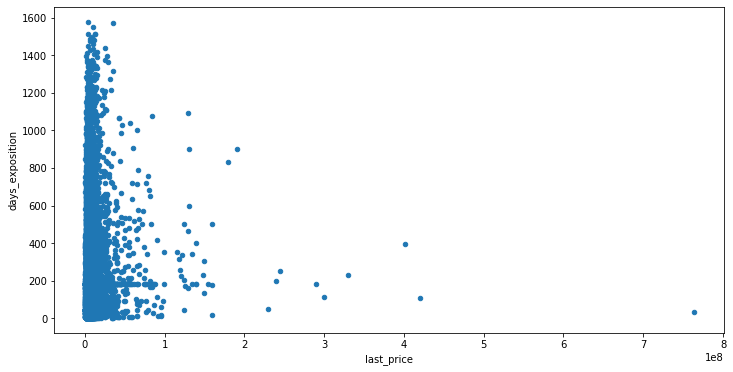

In [7]:
data.plot(x='first_day_exposition', y='days_exposition', style='x', figsize=(12,6))
data.plot(kind='scatter', x='last_price', y='days_exposition', figsize=(12,6),)

2. Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.

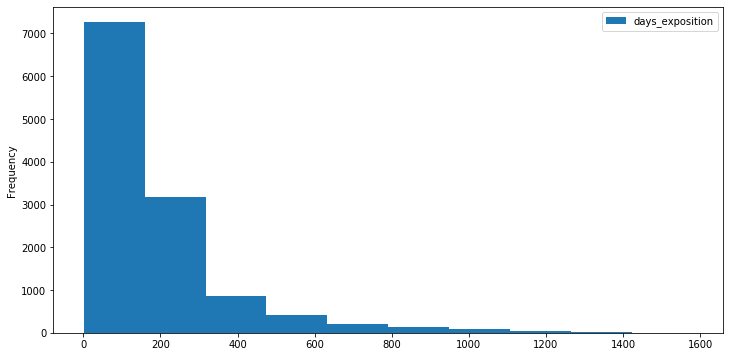

In [31]:
data['last_price'].describe().map(lambda n: '{:.1f}'.format(n))
data_price = data.query('3400000.0 <= last_price <= 6800000.0')
data_price.plot(kind='hist', y='days_exposition', figsize=(12,6))
data['balcony'] = data['balcony'].replace(1.15, 1)

Убрали максимальные и минимальные значения и график зависимости цены и дней размещения объявления сразу изменился. Разброс равномерный. С помощью .value_counts() нашла балконы со значением 1,15. Заменила их на 1.

3. Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.

In [9]:
data_price_rooms = data_price.groupby('rooms')['cost_meter'].median()
data_price_floor = data_price.groupby('floor_f')['cost_meter'].median()
data_price_cc = data_price.groupby('cityCenters_nearest')['cost_meter'].median()
data_price_wd = data_price.groupby('weekday')['cost_meter'].median()
data_price_month = data_price.groupby('month')['cost_meter'].median()
data_price_year = data_price.groupby('year')['cost_meter'].median()

Коэффициент корреляции: 0.06


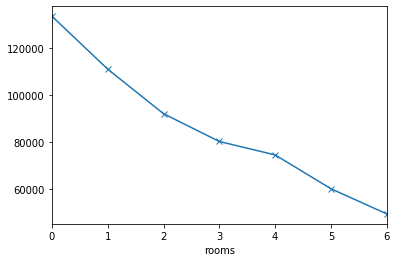

In [10]:
data_price_rooms.plot(x='rooms', y='cost_meter', style='x-')
print('Коэффициент корреляции: {:.2f}'.format(data['cost_meter'].corr(data['rooms'])))

Увеличение количества комнат отрицательно влияет на стоимость квадратного метра. Скорее всего связано с меньшим спросом на многокомнатные квартиры.

Коэффициент корреляции: 0.13


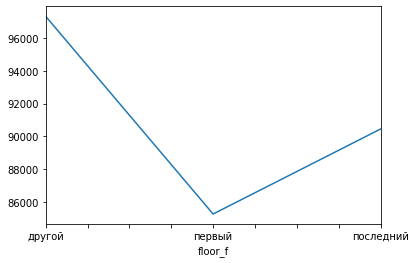

In [11]:
data_price_floor.plot(x='floor_f', y='cost_meter', style='-')
print('Коэффициент корреляции: {:.2f}'.format(data['cost_meter'].corr(data['floor'])))

Первый этаж никогда не был самым популярным у покупателей. Что интересно, последний также не самый популярный при выборе. Хотя на нем точно не зальют соседи.

Коэффициент корреляции: -0.28


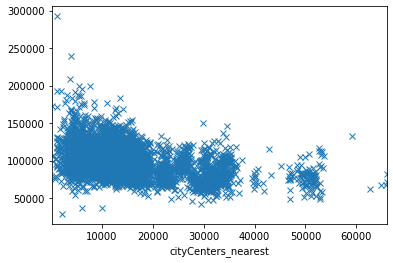

In [12]:
data_price_cc.plot(x='cityCenters_nearest', y='cost_meter', style='x')
print('Коэффициент корреляции: {:.2f}'.format(data['cost_meter'].corr(data['cityCenters_nearest'])))

Небольшая зависимость цены квадратного метра от удаленности от центра есть, но не кардинальная. Думаю, в Москве это прослеживалось бы явнее. А в Питере везде жить хорошо.

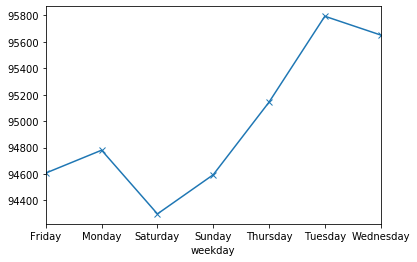

In [13]:
data_price_wd.plot(x='weekday', y='cost_meter', style='x-')

Самая высокая стоимость у объявлений, размещенных в выходные дни. В среду (как и у авиабилетов) стоимость стремится к минимуму.

Коэффициент корреляции: -0.00


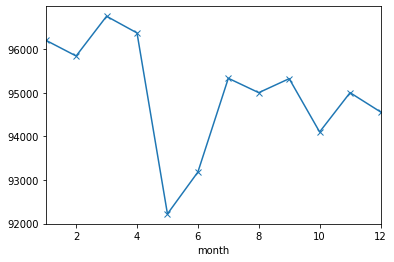

In [14]:
data_price_month.plot(x='month', y='cost_meter', style='x-')
print('Коэффициент корреляции: {:.2f}'.format(data['cost_meter'].corr(data['month'])))

Корреляция маленькая скорее всего из-за нелинейности зависимости. А так в мае стоимость падает. Возможно из-за майских праздников падает и предложение.

Коэффициент корреляции: 0.01


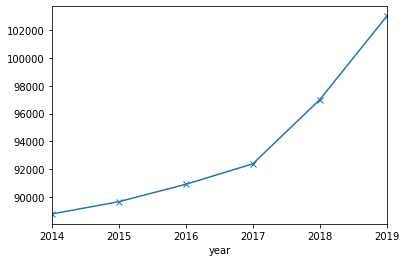

In [15]:
data_price_year.plot(x='year', y='cost_meter', style='x-')
print('Коэффициент корреляции: {:.2f}'.format(data['cost_meter'].corr(data['year'])))

Цена на квадратный метр растет, пожалуй, в геометрической прогрессии. Что и понятно, учитывая нашу внешнюю политику как раз с 2014 года.

4. Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.

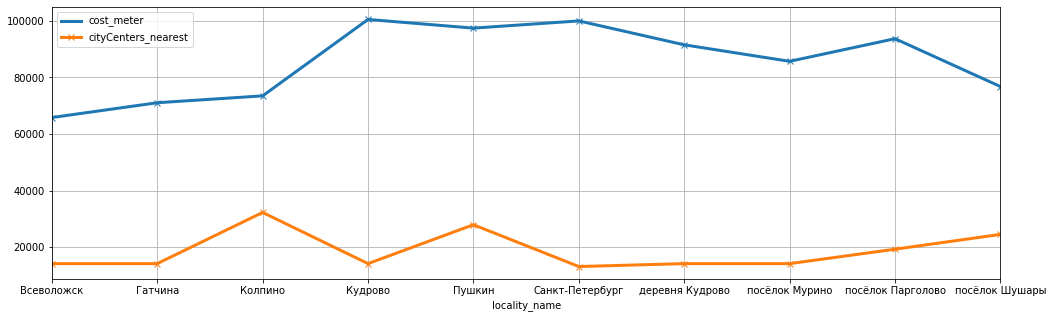

In [16]:
data_locality_name = data_price['locality_name'].value_counts().head(10)
data_price_new1 = data_price.query('locality_name in @data_locality_name.index')
data_price_new12 = data_price_new1.groupby('locality_name')['cost_meter'].median()
data_price_new13 = data_price_new1.groupby('locality_name')['cityCenters_nearest'].median()
data_price_new12.plot(x='locality_name', y='cost_meter', style='x-', figsize=(17,5), grid=True, legend=True, linewidth=3)
data_price_new13.plot(x='locality_name', y='cityCenters_nearest', style='x-', figsize=(17,5), grid=True, legend=True, linewidth=3)

В пригороде все неоднозначно. В далеком Пушкино стоимость как в Санкт-Петербурге или местном Кудрово, а в местном Всеволожске или Гатчине наоборот, стоимость ниже. Играет роль историческая ценность земли.

5. Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.

Корреляция цены и количества комнат в центре Санкт-Петербурга: 0.29
Корреляция цены и количества комнат в пригороде: 0.44


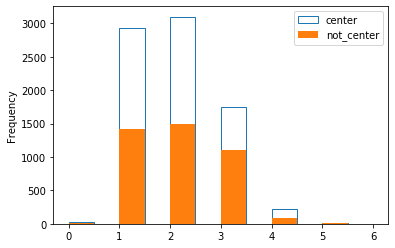

In [17]:
data_price_center = data_price[data_price['cityCenters_nearest'] <= 15000]
data_price_not_center = data_price[data_price['cityCenters_nearest'] > 15000]

ax_r = data_price_center.plot(kind='hist', y='rooms', bins=12, histtype='step', label='center')
data_price_not_center.plot(kind='hist', y='rooms', bins=12, ax=ax_r, label='not_center')

print(
    'Корреляция цены и количества комнат в центре Санкт-Петербурга: {:.2f}'
    .format(data_price_center['rooms'].corr(data_price_center['last_price']))
)
print(
    'Корреляция цены и количества комнат в пригороде: {:.2f}'
    .format(data_price_not_center['rooms'].corr(data_price_not_center['last_price']))
)

Приняв центр города в 15 км, построила графики кол-ва комнат и площади квартиры. По графику видно, что квартиры с одной и двумя комнатами - самые популярные, а трешки чуть ли не в 2 раза отстают от двушек. В пригороде они находятся примерно на одном уровне. Возможно связано с тем, что за городом предпочитают селиться семьи с детьми, а в городе трешки достаточно дороги, чтобы позволить их большой семье. Если верить корреляции от цены, то в пригороде количество комнат оказывает большее влияние на цену, чем в центре города.

Корреляция цены и площади квартиры в центре Санкт-Петербурга: 0.45
Корреляция цены и площади квартиры в пригороде: 0.64


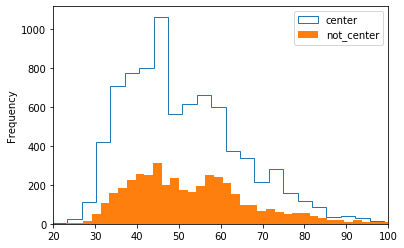

In [18]:

ax_ta = data_price_center.plot(kind='hist', y='total_area', bins=50, xlim=(20,100), histtype='step', label='center')
data_price_not_center.plot(kind='hist', y='total_area', bins=50, xlim=(20,100), ax=ax_ta, label='not_center')

print(
    'Корреляция цены и площади квартиры в центре Санкт-Петербурга: {:.2f}'
    .format(data_price_center['total_area'].corr(data_price_center['last_price']))
)
print(
    'Корреляция цены и площади квартиры в пригороде: {:.2f}'
    .format(data_price_not_center['total_area'].corr(data_price_not_center['last_price']))
)

На графике рассмотрена площадь квартиры. В центре распространены квартиры с площадью 46-47 кв м. В пригороде также этот размер является самым популярным. Если смотреть на корреляцию, то видно, как сильно размер квартиры сказывается на цене. Но в пригороде он играет более значительную роль. Возможно, потому что в пригороде меньше факторов, которые могли бы повлиять на цену, поэтому каждый становится важным и определяющим.

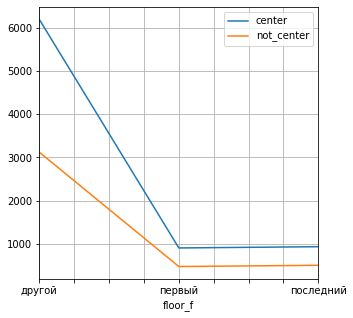

In [19]:
data_price_center2 = data_price_center.groupby('floor_f')['locality_name'].count()
data_price_not_center2 = data_price_not_center.groupby('floor_f')['locality_name'].count()
data_price_center2.plot(grid=True, figsize=(5,5), label='center', legend=True) 
data_price_not_center2.plot(grid=True, figsize=(5,5), label='not_center', legend=True)

Здесь видно, что кол-во объявлений на первом и последнем этажах в Питере и в пригороде параллельно, т.е. равномерно относительно друг друга. А вот разброс остальных этажей в Питере больше.

6. Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.

In [20]:
data_ap_group = data_price[data_price['is_apartment'] == True]
data_st_group = data_price[data_price['studio'] == True]
data_op_group = data_price[data_price['open_plan'] == True]

data_norm_flat = data_price[(data_price['is_apartment']!= True)&(data_price['studio']!= True)&(data_price['open_plan']!= True)]
data_norm_flat.loc[data_norm_flat.index, data_norm_flat.columns] = data_norm_flat
data_norm_flat['norm_flat'] = data_norm_flat['studio'].copy()

for i in data_ap_group:
    data_ap_group1 = data_ap_group.groupby(i)['is_apartment'].count()
    print(data_ap_group1)


for i in data_st_group:
    data_st_group1 = data_st_group.groupby(i)['studio'].count()
    print(data_st_group1)

for i in data_op_group:
    data_op_group1 = data_op_group.groupby(i)['open_plan'].count()
    print(data_op_group1)

for i in data_norm_flat:
    data_norm_flat1 = data_norm_flat.groupby(i)['norm_flat'].count()
    print(data_norm_flat1)


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


total_images
0     1
4     1
6     1
7     2
8     3
9     1
10    2
12    1
13    2
14    2
15    1
16    1
18    2
20    1
Name: is_apartment, dtype: int64
last_price
3500000.0    1
3600000.0    1
3676365.0    1
3850000.0    1
4000000.0    1
4100000.0    1
4300000.0    2
4779000.0    1
4792000.0    1
4887000.0    1
4931398.0    1
5289476.0    1
5400000.0    1
5500000.0    2
5616379.0    1
6030000.0    1
6100000.0    1
6390000.0    1
6600000.0    1
Name: is_apartment, dtype: int64
total_area
30.50    1
31.00    1
31.23    1
32.00    1
33.00    1
41.76    1
42.90    1
46.90    1
47.40    1
49.00    1
50.00    1
50.40    1
52.40    1
53.10    1
56.40    1
58.00    2
58.70    1
95.00    1
98.00    2
Name: is_apartment, dtype: int64
first_day_exposition
2016-04-06    1
2016-04-13    1
2016-05-16    1
2017-04-07    1
2017-08-07    1
2018-02-20    1
2018-02-21    1
2018-03-15    1
2018-03-18    1
2018-03-19    1
2018-06-12    1
2018-07-18    1
2018-07-23    3
2018-07-25    1
2018-09-08    1

floors_total
1        8
2       50
3      191
4      368
5     2421
6      276
7      196
8      142
9     2661
10     726
11      80
12     868
13     109
14     340
15     192
16     834
17     478
18     297
19     184
20     124
21      97
22     166
23     223
24     260
25     609
26      89
27      98
28       7
29       1
34       1
35      10
36       1
37       1
52       1
60       1
Name: norm_flat, dtype: int64
living_area
2.00       1
3.00       1
5.40       1
6.00       1
6.50       1
8.00       1
8.30       1
8.40       1
8.50       1
8.90       1
9.00       5
9.10       1
9.80       1
10.00     13
10.08      1
10.30      1
10.40      2
10.50      3
10.52      1
10.60      2
10.70      2
10.76      1
10.80      1
11.00      9
11.10      2
11.15      1
11.20      2
11.30      1
11.47      1
11.50      2
          ..
67.30      1
67.50      2
67.80      1
68.00      2
68.10      1
68.50      1
69.00      1
69.10      1
70.00      2
70.50      1
71.50      1
72.20      1
7

Да, очень громоздко, но уже нет сил искать более простой способ решения. Посмотрев на результат, можно выделить следующие интересные значения:
количество комнат, количество этажей в доме, этаж квартиры, место расположения квартиры и год выставления квартиры на продажу.

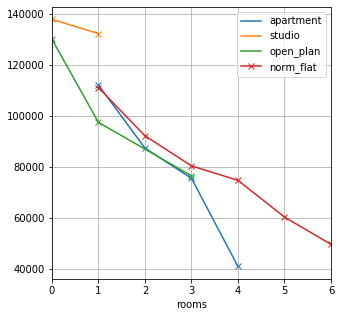

In [21]:
data_ap_group_rooms = data_ap_group.groupby('rooms')['cost_meter'].median()
data_st_group_rooms = data_st_group.groupby('rooms')['cost_meter'].median()
data_op_group_rooms = data_op_group.groupby('rooms')['cost_meter'].median()
data_norm_flat_rooms = data_norm_flat.groupby('rooms')['cost_meter'].median()

data_ap_group_rooms.plot(x='rooms', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='apartment')
data_st_group_rooms.plot(x='rooms', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='studio')
data_op_group_rooms.plot(x='rooms', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='open_plan')
data_norm_flat_rooms.plot(x='rooms', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='norm_flat')


На этом графике сравним все 4 типа квартир из задачи по предложенному количеству комнат. Во всех вариантах чем больше комнат, тем ниже цена за кв метр.

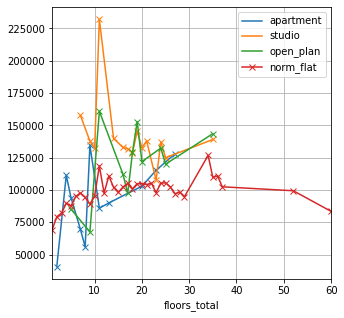

In [22]:
data_ap_group_FT = data_ap_group.groupby('floors_total')['cost_meter'].median()
data_st_group_FT = data_st_group.groupby('floors_total')['cost_meter'].median()
data_op_group_FT = data_op_group.groupby('floors_total')['cost_meter'].median()
data_norm_flat_FT = data_norm_flat.groupby('floors_total')['cost_meter'].median()

data_ap_group_FT.plot(x='floors_total', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='apartment')
data_st_group_FT.plot(x='floors_total', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='studio')
data_op_group_FT.plot(x='floors_total', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='open_plan')
data_norm_flat_FT.plot(x='floors_total', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='norm_flat')

Сравнивая здесь разные типы квартир, можно отметить, что самые дорогие квартиры продаются в 11этажках. Кроме апартаментов. Скорее всего это какой-нибудь типовой государственный дом. Апартаменты самые дорогие в 9тиэтажных зданиях и после 11 этажа начинаю наращивать свою стоимость. Обычные квартиры не зависят от этажности дома. Видимо для выбора других типов квартир этажность имеет большее значение. 

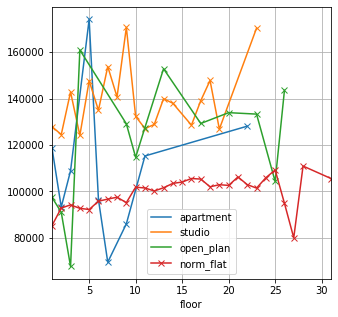

In [23]:
data_ap_group_F = data_ap_group.groupby('floor')['cost_meter'].median()
data_st_group_F = data_st_group.groupby('floor')['cost_meter'].median()
data_op_group_F = data_op_group.groupby('floor')['cost_meter'].median()
data_norm_flat_F = data_norm_flat.groupby('floor')['cost_meter'].median()

data_ap_group_F.plot(x='floor', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='apartment')
data_st_group_F.plot(x='floor', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='studio')
data_op_group_F.plot(x='floor', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='open_plan')
data_norm_flat_F.plot(x='floor', y='cost_meter', style='x-', figsize=(5,5), grid=True, legend=True, label='norm_flat')

Интересно, что на 1м этаже самая низкая стоимость у обычных квартир. А апартаменты не пользуются спросом на 7м этаже. Судя по всему, именно поэтому там стоимость за квадратный метр ниже всего. 

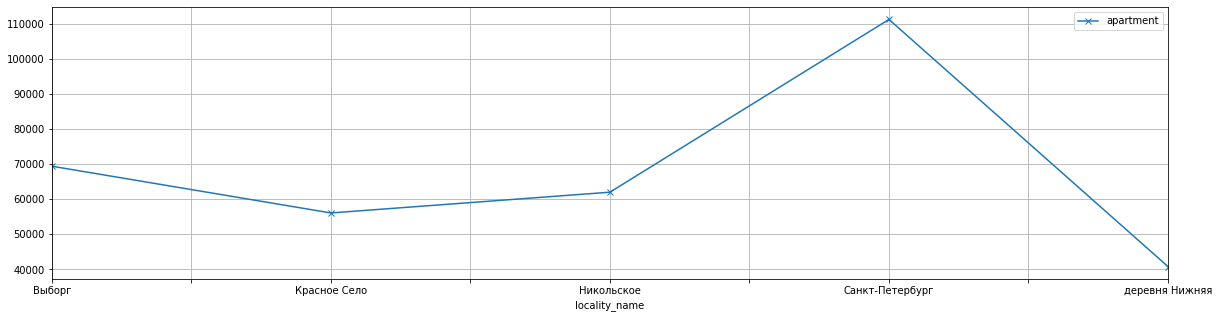

In [24]:
data_ap_group_LN = data_ap_group.groupby('locality_name')['cost_meter'].median()
data_st_group_LN = data_st_group.groupby('locality_name')['cost_meter'].median()
data_op_group_LN = data_op_group.groupby('locality_name')['cost_meter'].median()
data_norm_flat_LN = data_norm_flat.groupby('locality_name')['cost_meter'].median()

data_ap_group_LN.plot(x='locality_name', y='cost_meter', style='x-', figsize=(20,5), grid=True, legend=True, label='apartment')

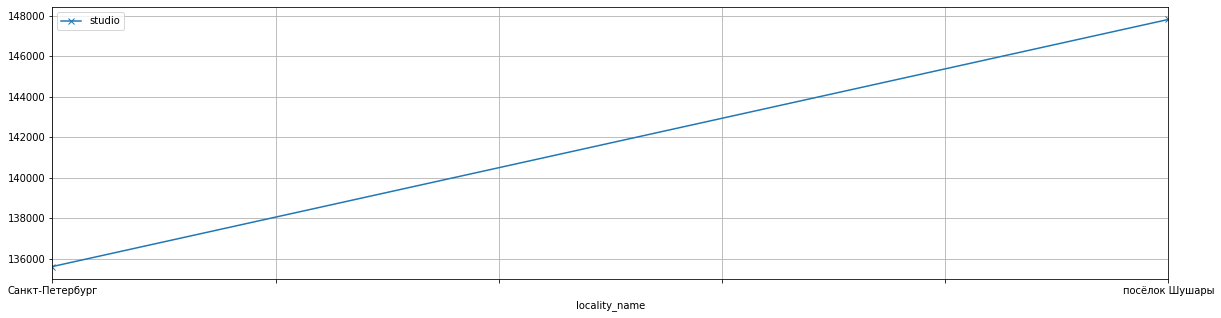

In [25]:
data_st_group_LN.plot(x='locality_name', y='cost_meter', style='x-', figsize=(20,5), grid=True, legend=True, label='studio')


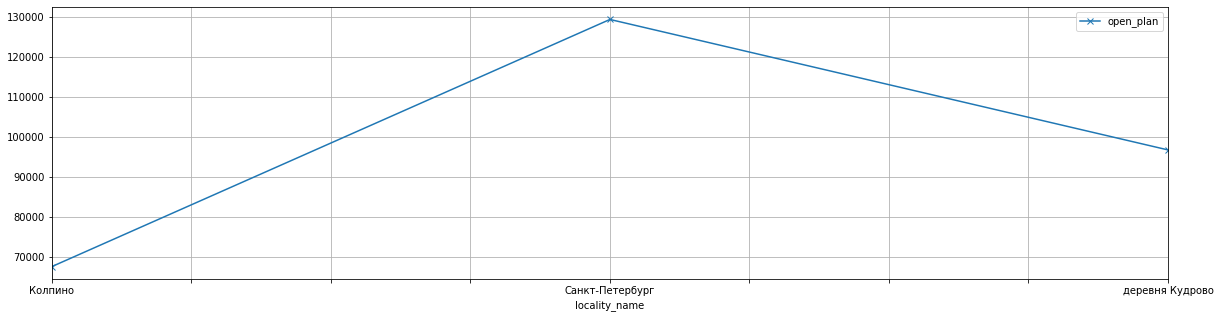

In [26]:
data_op_group_LN.plot(x='locality_name', y='cost_meter', style='x-', figsize=(20,5), grid=True, legend=True, label='open_plan')


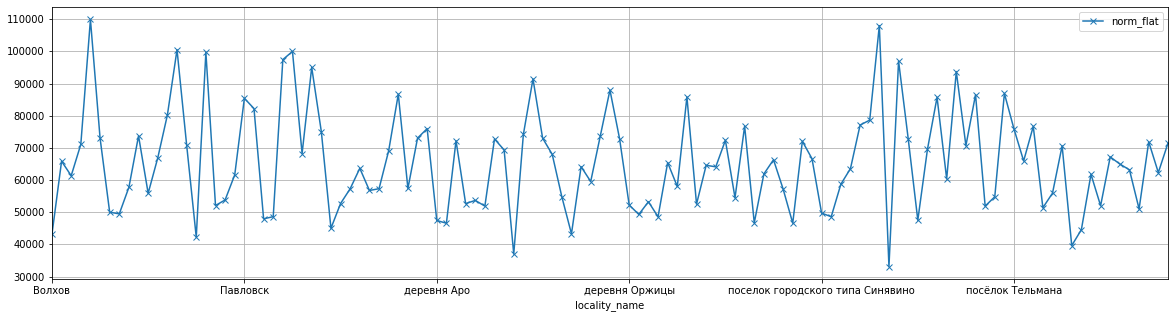

In [27]:
data_norm_flat_LN.plot(x='locality_name', y='cost_meter', style='x-', figsize=(20,5), grid=True, legend=True, label='norm_flat')

Зависимость стоимости кв метра от локального расположения квартиры рассмотрим отдельно для каждого типа квартир на каждом графике. Самый дорогой кв метр у апартаментов вышел в Санкт-Петербурге. Как и у квартир с открытой планировкой. А вот у студий в поселке Шушары метр дороже, чем в Питере. Скорее всего обусловлено близким расположением аэропорта Пулково.

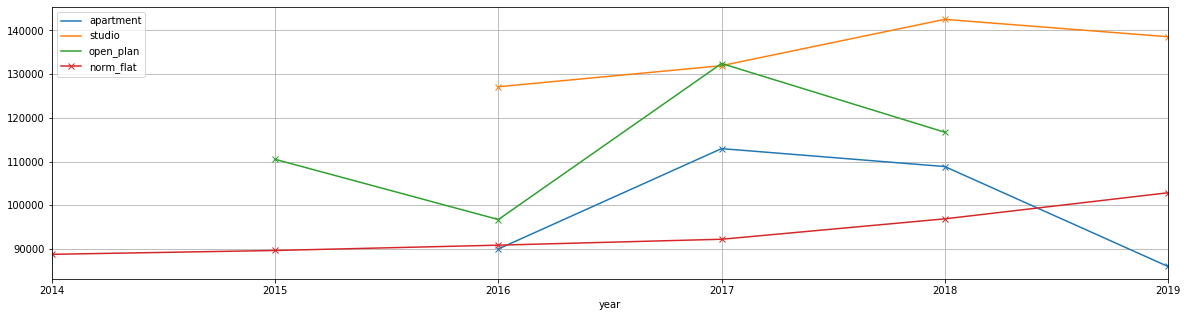

In [28]:
data_ap_group_year = data_ap_group.groupby('year')['cost_meter'].median()
data_st_group_year = data_st_group.groupby('year')['cost_meter'].median()
data_op_group_year = data_op_group.groupby('year')['cost_meter'].median()
data_norm_flat_year = data_norm_flat.groupby('year')['cost_meter'].median()

data_ap_group_year.plot(x='year', y='cost_meter', style='x-', figsize=(20,5), grid=True, legend=True, label='apartment')
data_st_group_year.plot(x='year', y='cost_meter', style='x-', figsize=(20,5), grid=True, legend=True, label='studio')
data_op_group_year.plot(x='year', y='cost_meter', style='x-', figsize=(20,5), grid=True, legend=True, label='open_plan')
data_norm_flat_year.plot(x='year', y='cost_meter', style='x-', figsize=(20,5), grid=True, legend=True, label='norm_flat')

Сравнивая по году продажи квартиры, можно заметить, что квартиры с открытой планировкой выставлялись в период с 2015 года по 2018. Возможно, интерес к ним пропал, цена также просела. Стоимость кв метра обычной квартиры только растет. А вот стоимость апартаментов снизилась. Даже ниже, чем у обычных квартир. Наверно, люди начали чаще думать о стабильности и важности прописки.